# Check out Pb fields from test runs

In [179]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
from math import sin, cos, sqrt, atan2, radians
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import pickle
import matplotlib

%matplotlib inline

#### Parameters:

In [216]:
# domain dimensions:
jmin, jmax = 159, 799
imin, imax = 1139, 2179

# Resolution of grid cells to show in figure:
grid_reso = 10

# Rimwidths:
rimwidthN  = 10
rimwidthS  = 10
rimwidthW  = 10
rimwidthE  = 20

# Boundary coordinates: (i1,i2,j1,j2)
bdy_NCB = (1600,imax,jmax-rimwidthE,jmax) # Northern Canada Basin
bdy_WCB = (imax-rimwidthN,imax,391,jmax)  # Western Canada Basin
bdy_LS  = (imin,imin+rimwidthS,449,674)   # Baffin Bay
bdy_HB  = (1189,1474,291,291+rimwidthW)   # Hudson Bay

land_color         = '#a9a7a2'

#### Load files:

In [181]:
mfile    = nc.Dataset('/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12_mask_Pb-20220317.nc')
mesh_lon = np.array(mfile.variables['nav_lon'])
mesh_lat = np.array(mfile.variables['nav_lat'])
mask     = np.array(mfile.variables['tmask'][0])
mesh_bathy   = np.array(mfile.variables['tmask'][0,:,:,:])
bathy_masked = np.ma.masked_where((mesh_bathy> 0.1), mesh_bathy)
mesh_depth   = np.array(mfile.variables['nav_lev'])

In [205]:
folder = '/data/brogalla/run_storage/pb-step9_2022-08-23T173359.210294-0400/'
data   = nc.Dataset(f'{folder}ANHA12_EXH006_5d_20020101_20021231_ptrc_T_20020101-20020105.nc')
dpb    = np.ma.masked_where((mask[:,imin:imax,jmin:jmax] == 0), np.array(data.variables['dissolpb'])[0,:,:,:])

print(np.ma.min(dpb), np.ma.max(dpb))

-3.294546e-12 1.0346615e-09


In [198]:
for depth in range(0,50):
    print(f'Min: {depth}, {np.ma.min(dpb[depth,:,:]):.2e}, max: {np.ma.max(dpb[depth,:,:]):.2e}')

Min: 0, 0.00e+00, max: 1.36e-10
Min: 1, 0.00e+00, max: 1.36e-10
Min: 2, 0.00e+00, max: 1.36e-10
Min: 3, 0.00e+00, max: 1.36e-10
Min: 4, 0.00e+00, max: 1.36e-10
Min: 5, 0.00e+00, max: 1.36e-10
Min: 6, 0.00e+00, max: 1.36e-10
Min: 7, 0.00e+00, max: 2.97e-10
Min: 8, 0.00e+00, max: 1.03e-09
Min: 9, 0.00e+00, max: 6.05e-10
Min: 10, -1.20e-12, max: 8.05e-10
Min: 11, 0.00e+00, max: 9.20e-10
Min: 12, 0.00e+00, max: 7.84e-10
Min: 13, -2.20e-12, max: 6.79e-10
Min: 14, 0.00e+00, max: 4.94e-10
Min: 15, -2.39e-12, max: 4.14e-10
Min: 16, -3.29e-12, max: 4.54e-10
Min: 17, 0.00e+00, max: 5.77e-10
Min: 18, 0.00e+00, max: 4.80e-10
Min: 19, 0.00e+00, max: 3.55e-10
Min: 20, 0.00e+00, max: 3.37e-10
Min: 21, 0.00e+00, max: 3.28e-10
Min: 22, 0.00e+00, max: 2.60e-10
Min: 23, 0.00e+00, max: 1.85e-10
Min: 24, 0.00e+00, max: 1.56e-10
Min: 25, 0.00e+00, max: 1.25e-10
Min: 26, 0.00e+00, max: 1.20e-10
Min: 27, 0.00e+00, max: 1.01e-10
Min: 28, 0.00e+00, max: 7.48e-11
Min: 29, 0.00e+00, max: 5.76e-11
Min: 30, 0.00e+0

/home/brogalla/miniconda3/envs/julab/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  


#### Figure:

In [199]:
def plot_layer(variable, layer):
    
    fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/pb-surface.pickle','rb'))

    x, y = proj1(mesh_lon[imin:imax,jmin:jmax], mesh_lat[imin:imax,jmin:jmax]) 
#     CB = proj1.pcolormesh(x, y, variable[layer,:,:]*1e12, cmap=cmocean.cm.thermal) 
    variable_plot = np.ma.masked_where(variable[layer,:,:] > 0, variable[layer,:,:])
    x_plot   = x[~variable_plot.mask]
    y_plot   = y[~variable_plot.mask]
    var_plot = variable_plot[~variable_plot.mask] 
    
    CB = proj1.scatter(x_plot, y_plot, c=var_plot*1e12, s=5)
#     CB = proj1.pcolormesh(x, y, variable_plot*1e12, cmap=cmocean.cm.thermal) 
#     CB = proj1.pcolormesh(x[bdy_LS[0]-imin:bdy_LS[1]-imin,bdy_LS[2]-jmin:bdy_LS[3]-jmin], \
#                           y[bdy_LS[0]-imin:bdy_LS[1]-imin,bdy_LS[2]-jmin:bdy_LS[3]-jmin], \
#                           variable[layer,bdy_LS[0]-imin:bdy_LS[1]-imin,bdy_LS[2]-jmin:bdy_LS[3]-jmin]*1e12, cmap=cmocean.cm.thermal)

    # Color bar: --------------------------------------------------------------------------------
    cbaxes = fig.add_axes([0.92, 0.155, 0.02, 0.38]);
    CBar   = plt.colorbar(CB, ax=ax1, cax=cbaxes); 
    CBar.set_label('Dissolved Pb [pM]', fontsize=7)
    CBar.ax.tick_params(axis='y', length=0, labelsize=7)
    
    return

In [222]:
def plot_bdy(bdy_cell, nCB_cell):

    fig, ax = plt.subplots(2,2, figsize=(4.5*2, 3.7*1.5), dpi=300)

    ax[0,0].set_title('Labrador Sea', fontsize=7)
    ax[0,1].set_title('Hudson Bay', fontsize=7)
    ax[1,0].set_title('Western Canada Basin', fontsize=7)
    ax[1,1].set_title('Northern Canada Basin', fontsize=7)

    ax[1,0].set_xlabel('Distance [km]', fontsize=6)
    ax[1,1].set_xlabel('Distance [km]', fontsize=6)
    ax[0,0].set_ylabel('Depth [m]', fontsize=6)
    ax[1,0].set_ylabel('Depth [m]', fontsize=6)

    for axis in ax.ravel():
        axis.invert_yaxis()
        axis.tick_params(axis='both', which='major', labelsize=6)

    ax[0,0].set_ylim(4000,-10)
    ax[0,1].set_ylim(300,-1)
    ax[1,0].set_ylim(3000,-10)
    ax[1,1].set_ylim(4000,-10)

    ax[0,1].set_xlim(0,1000)
    ax[1,0].set_xlim(200,1650)

    cmap     = cmocean.cm.thermal

    # Labrador Sea:
    xx, zz = np.meshgrid(S_distance, mesh_depth)
    CB1 = ax[0,0].pcolormesh(xx, zz, dPb_S[:,rimwidthS-1-bdy_cell,:], vmin=0, vmax=30, cmap=cmap)
    ax[0,0].pcolormesh(xx, zz, dPb_S_mdepths[:,rimwidthS-1-bdy_cell,:], cmap=matplotlib.colors.ListedColormap([land_color]))

    # Hudson Bay: 
    xx, zz = np.meshgrid(W_distance, mesh_depth)
    CB2 = ax[0,1].pcolormesh(xx, zz, dPb_W[:,:,rimwidthW-1-bdy_cell], vmin=0, vmax=8, cmap=cmap)
    ax[0,1].pcolormesh(xx, zz, dPb_W_mdepths[:,:,rimwidthW-1-bdy_cell], cmap=matplotlib.colors.ListedColormap([land_color]))

    # Western Canada Basin:
    xx, zz = np.meshgrid(N_distance, mesh_depth)
    CB3 = ax[1,0].pcolormesh(xx, zz, dPb_N[:,bdy_cell,:], vmin=0, vmax=8, cmap=cmap)
    ax[1,0].pcolormesh(xx, zz, dPb_N_mdepths[:,bdy_cell,:], cmap=matplotlib.colors.ListedColormap([land_color]))

    # Northern Canada Basin:
    xx, zz = np.meshgrid(E_distance[::-1], mesh_depth)
    CB4 = ax[1,1].pcolormesh(xx, zz, dPb_E[:,:,nCB_cell], vmin=0, vmax=8, cmap=cmap)
    ax[1,1].pcolormesh(xx, zz, dPb_E_mdepths[:,:,nCB_cell], cmap=matplotlib.colors.ListedColormap([land_color]))

    # add text labels:
    fig.text(0.13, 0.89, 'a)', fontsize=8, weight='bold');
    fig.text(0.55, 0.89, 'b)', fontsize=8, weight='bold');
    fig.text(0.13, 0.48, 'c)', fontsize=8, weight='bold');
    fig.text(0.55, 0.48, 'd)', fontsize=8, weight='bold');

    cbax1 = fig.add_axes([0.13 , 0.55, 0.01, 0.12]);
    cbax2 = fig.add_axes([0.555, 0.55, 0.01, 0.12]);
    cbax3 = fig.add_axes([0.13 , 0.14, 0.01, 0.12]);
    cbax4 = fig.add_axes([0.555, 0.14, 0.01, 0.12]);
    cbaxes = [cbax1, cbax2, cbax3, cbax4]

    for n,cb in enumerate([CB1, CB2, CB3, CB4]):
        if n > 0:
            CBar = plt.colorbar(cb, ax=ax, cax=cbaxes[n], ticks=[0,2,4,6,8]); 
        else:
            CBar = plt.colorbar(cb, ax=ax, cax=cbaxes[n]); 
        CBar.set_label('Dissolved Pb [pM]', fontsize=6)
        CBar.ax.tick_params(axis='y', length=0, labelsize=6)

    return

In [201]:
# Convert lat/lon to distance along transect:
def calc_distance(lats, lons):
    R = 6373.0 # approximate radius of earth in km

    lats_rad = [radians(l) for l in lats]
    lons_rad = [radians(l) for l in lons]

    dlon = [lon_step - lons_rad[0] for lon_step in lons_rad]
    dlat = [lat_step - lats_rad[0] for lat_step in lats_rad]

    distance = np.empty((len(dlon)))
    for i in range(0,len(dlon)):
        a = sin(dlat[i] / 2)**2 + cos(lats_rad[0]) * cos(lats_rad[i]) * sin(dlon[i] / 2)**2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))
        distance[i] = R * c
        
    return distance

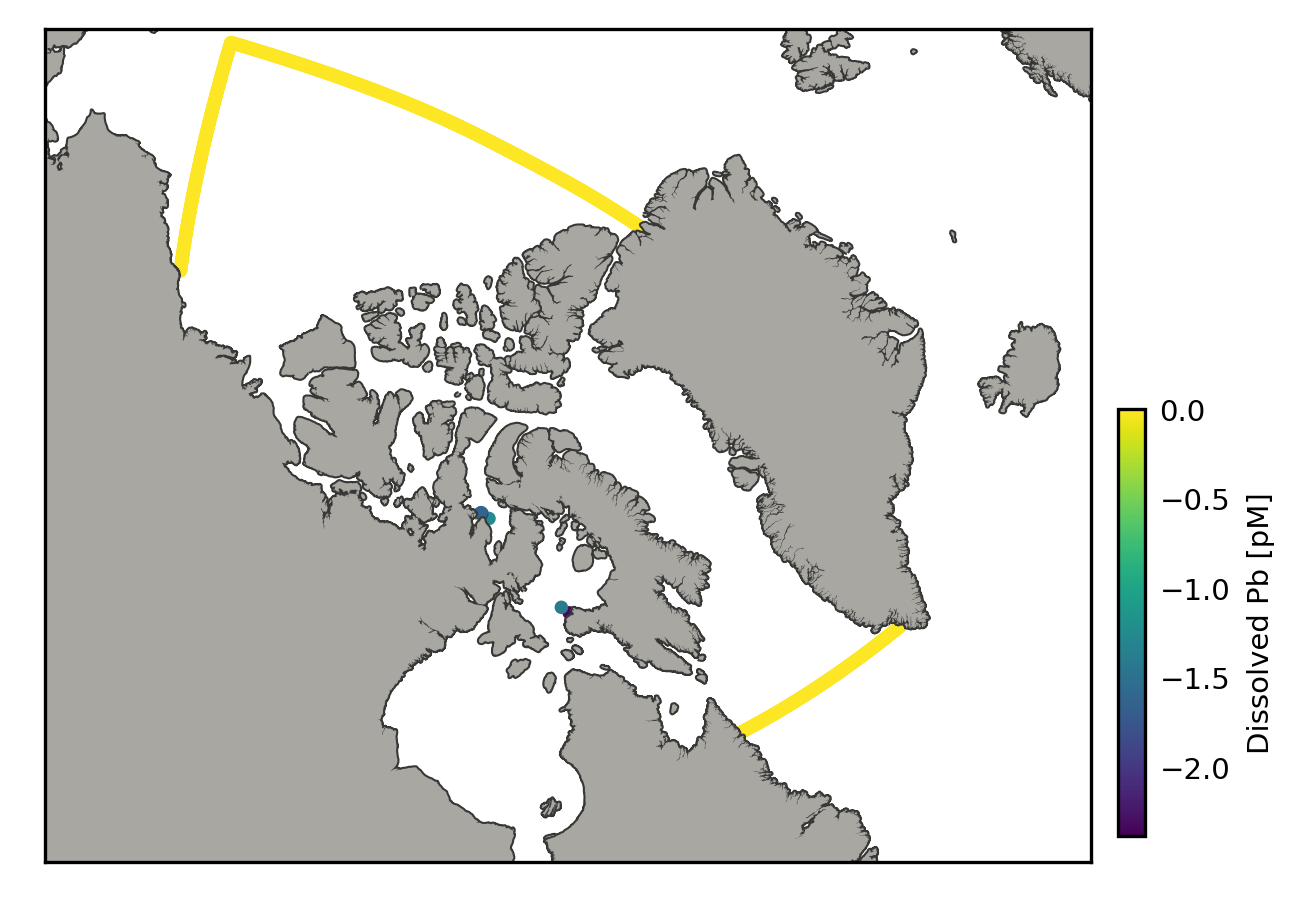

In [202]:
# resus
plot_layer(dpb, 15)

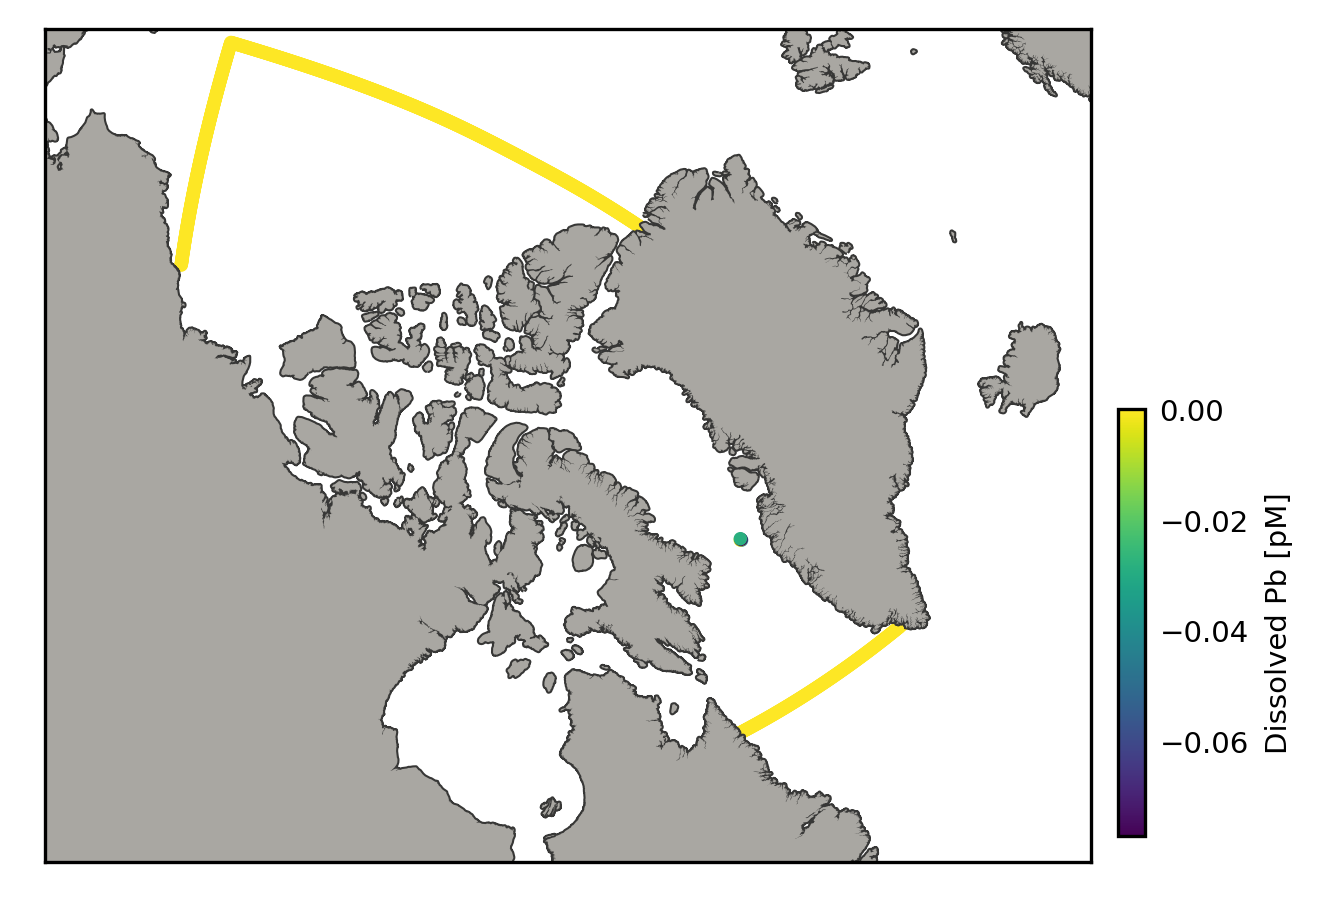

In [53]:
# sedice
plot_layer(dpb, 17)

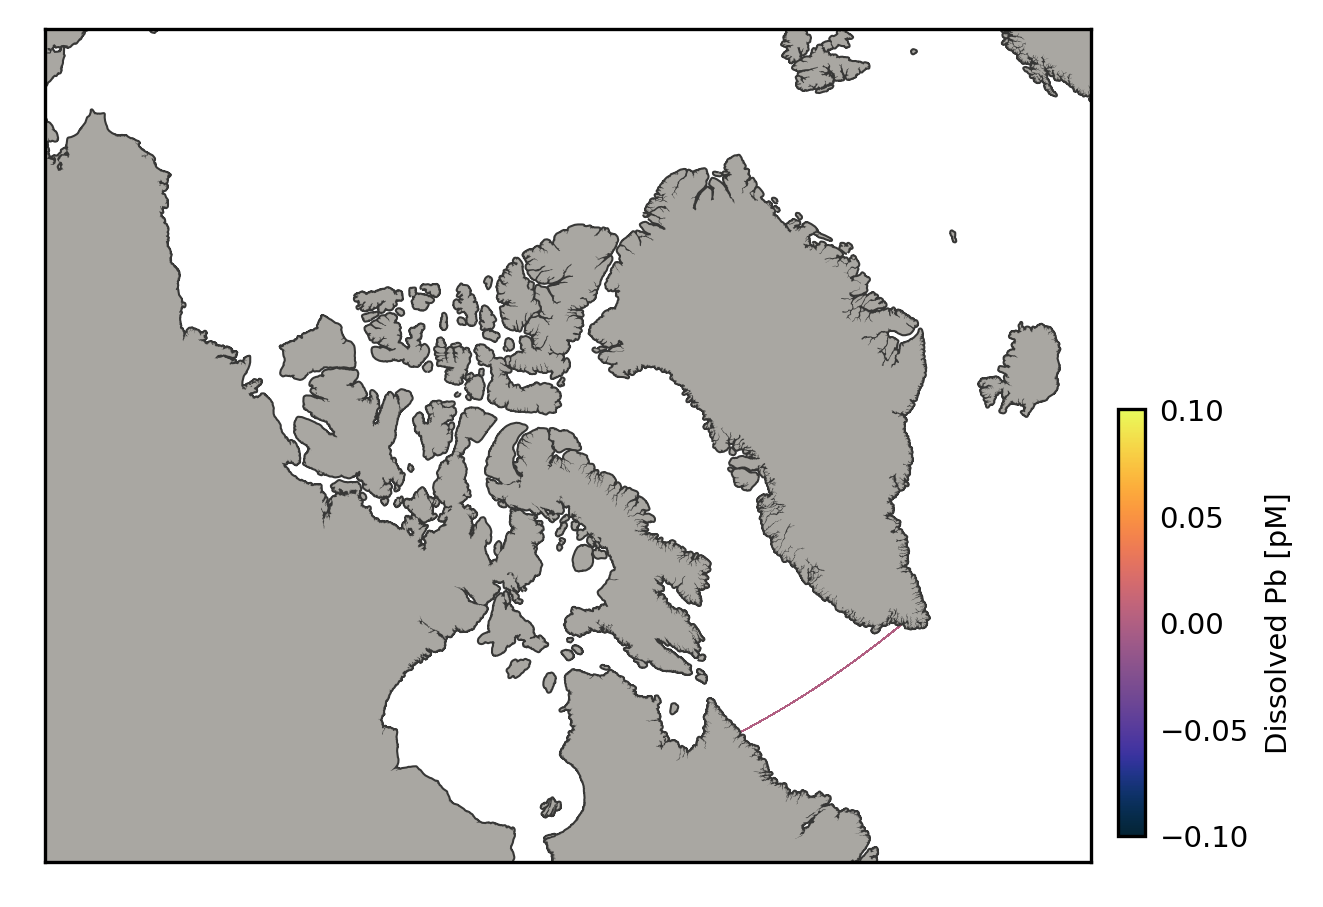

In [8]:
plot_layer(dpb, 1)

#### Look at boundary conditions

In [230]:
folder = '/data/brogalla/run_storage/pb-bc2_2022-08-30T150150.552475-0400/'
data   = nc.Dataset(f'{folder}ANHA12_EXH006_5d_20020101_20021231_ptrc_T_20020205-20020209.nc')
dpb    = np.ma.masked_where((mask[:,imin:imax,jmin:jmax] == 0), np.array(data.variables['dissolpb'])[0,:,:,:])

print(np.ma.min(dpb), np.ma.max(dpb))

0.0 2.2380178e-11


In [231]:
# Labrador Sea
dPb_S_lons    = mesh_lon[bdy_LS[0]:bdy_LS[1],bdy_LS[2]:bdy_LS[3]] 
dPb_S_lats    = mesh_lat[bdy_LS[0]:bdy_LS[1],bdy_LS[2]:bdy_LS[3]]
dPb_S_mdepths = bathy_masked[:,bdy_LS[0]:bdy_LS[1],bdy_LS[2]:bdy_LS[3]]
dPb_S         = dpb[:,bdy_LS[0]-imin:bdy_LS[1]-imin, bdy_LS[2]-jmin:bdy_LS[3]-jmin]*1e12

# Northern Canada Basin
dPb_E_lons    = mesh_lon[bdy_NCB[0]:bdy_NCB[1],bdy_NCB[2]:bdy_NCB[3]] 
dPb_E_lats    = mesh_lat[bdy_NCB[0]:bdy_NCB[1],bdy_NCB[2]:bdy_NCB[3]] 
dPb_E_mdepths = bathy_masked[:,bdy_NCB[0]:bdy_NCB[1],bdy_NCB[2]:bdy_NCB[3]] 
dPb_E         = dpb[:,bdy_NCB[0]-imin:bdy_NCB[1]-imin, bdy_NCB[2]-jmin:bdy_NCB[3]-jmin]*1e12

# Western Canada Basin
dPb_N_lons    = mesh_lon[bdy_WCB[0]:bdy_WCB[1],bdy_WCB[2]:bdy_WCB[3]] 
dPb_N_lats    = mesh_lat[bdy_WCB[0]:bdy_WCB[1],bdy_WCB[2]:bdy_WCB[3]]
dPb_N_mdepths = bathy_masked[:,bdy_WCB[0]:bdy_WCB[1],bdy_WCB[2]:bdy_WCB[3]]
dPb_N         = dpb[:,bdy_WCB[0]-imin:bdy_WCB[1]-imin, bdy_WCB[2]-jmin:bdy_WCB[3]-jmin]*1e12

# Hudson Bay
dPb_W_lons    = mesh_lon[bdy_HB[0]:bdy_HB[1],bdy_HB[2]:bdy_HB[3]] 
dPb_W_lats    = mesh_lat[bdy_HB[0]:bdy_HB[1],bdy_HB[2]:bdy_HB[3]] 
dPb_W_mdepths = bathy_masked[:,bdy_HB[0]:bdy_HB[1],bdy_HB[2]:bdy_HB[3]] 
dPb_W         = dpb[:,bdy_HB[0]-imin:bdy_HB[1]-imin, bdy_HB[2]-jmin:bdy_HB[3]-jmin]*1e12

In [232]:
# Look at only one slice of the rimwidth thickness boundary:
S_distance  = calc_distance(dPb_S_lats[-1,:]   , dPb_S_lons[-1,:])    # Labrador Sea
N_distance  = calc_distance(dPb_N_lats[-1,:]   , dPb_N_lons[-1,:])    # western CB
E_distance  = calc_distance(dPb_E_lats[:,-1], dPb_E_lons[:,-1]) # northern CB
W_distance  = calc_distance(dPb_W_lats[:,-1], dPb_W_lons[:,-1]) # Hudson Bay

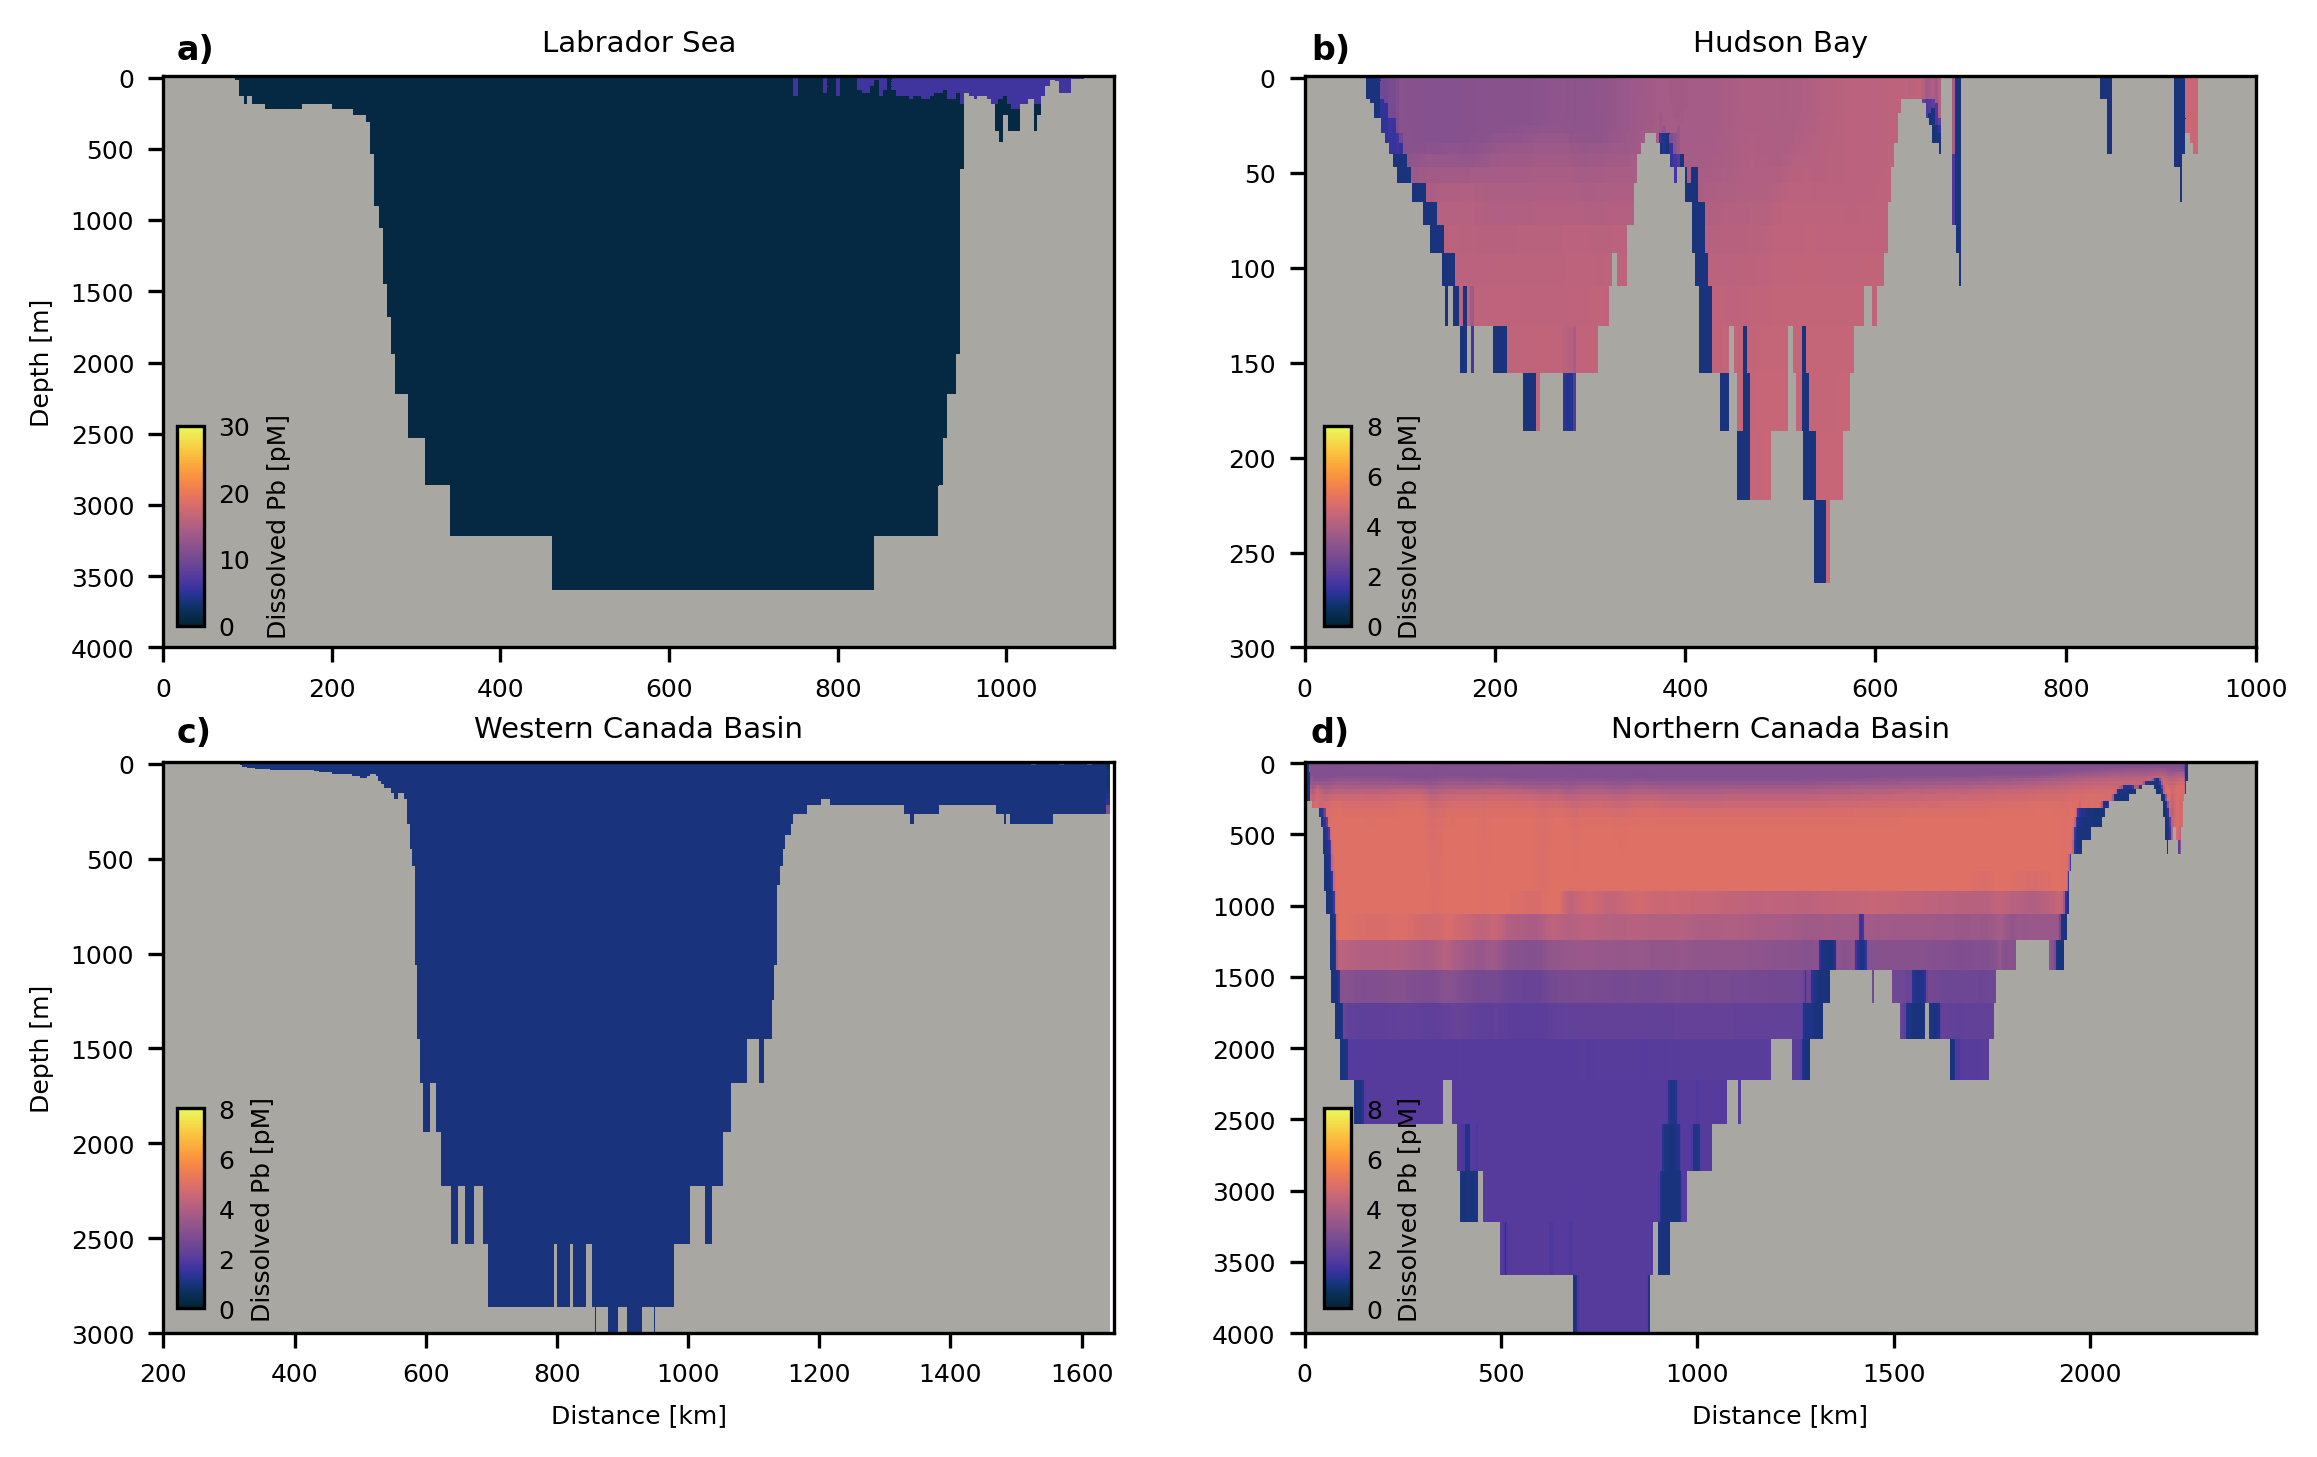

In [253]:
plot_bdy(8,12)